# MOVIE RECOMMENDATION SYSTEM

## BUSINESS UNDERSTANDING

### Overview
The entertainment industry is rapidly evolving, and streaming services generate vast amounts of user interaction data. Personalized recommendations have become crucial for improving user engagement and retention. The MovieLens dataset, provided by the GroupLens research lab at the University of Minnesota, offers a rich set of user ratings that can be leveraged to build a robust movie recommendation system.

This project aims to develop a personalized recommendation model that provides users with highly relevant movie suggestions based on their past preferences. By utilizing collaborative filtering techniques, we can enhance the user experience by helping them discover movies they are likely to enjoy, thereby increasing platform engagement and reducing decision fatigue.

### Problem Statement
Users often struggle with finding movies they will enjoy due to the overwhelming number of choices available on streaming platforms. Traditional browsing methods, such as genre-based filtering or trending lists, may not always reflect an individual’s unique preferences.

To address this challenge, we aim to build a recommendation system that suggests the top 5 movies for a user based on their past ratings. The system will leverage collaborative filtering techniques to analyze user interactions and provide personalized movie recommendations.

By implementing an efficient recommendation system, we can improve user satisfaction, optimize content discovery, and create a seamless entertainment experience.

### Objective
- Develop a movie recommendation model using the MovieLens dataset (100K ratings).
- Generate top 5 personalized movie recommendations for each user.

### Metric of success
Build a recommendation system that suggests the top 5 movies for a user based on their past ratings.

## DATA UNDERSTANDING

The MovieLens dataset contains 100,000 ratings, as well as demographic information and movie metadata, collected from 9,000 movies by 600 users. The dataset was collected and made available by GroupLens, a research lab at the University of Minnesota. The purpose of the dataset is to enable research in recommendation systems and related fields.

The dataset can be downloaded from the GroupLens website (https://grouplens.org/datasets/movielens/latest/).

- #### Importing Libraries

In [103]:
# DATA HANDLING & MANIPULATION
import pandas as pd  # For reading, processing, and manipulating structured data
import numpy as np  # For numerical computations and handling arrays efficiently
import csv  # For working with CSV files (though pandas can handle them efficiently)
from collections import Counter  # For counting elements in datasets (useful in exploratory data analysis)

# DATA VISUALIZATION & EXPLORATORY DATA ANALYSIS
import matplotlib.pyplot as plt  # For static data visualizations
import seaborn as sns  # For advanced statistical visualizations

# MACHINE LEARNING & RECOMMENDATION SYSTEM
## Scikit-learn (for preprocessing, pipeline, and model selection)
from sklearn.model_selection import train_test_split  # Splits data and performs hyperparameter tuning
from sklearn.pipeline import Pipeline  # Creates streamlined workflows

## SciPy Sparse Matrix & SVD (for Matrix Factorization)
from scipy.sparse import csc_matrix  # Converts data into a sparse matrix format (useful for large datasets)
from scipy.sparse.linalg import svds  # Computes Singular Value Decomposition (SVD) for collaborative filtering

## Surprise Library (for collaborative filtering-based recommendations)
from surprise import Dataset  # Loads and structures dataset for recommendation models
from surprise import Reader  # Defines rating scale for dataset
from surprise import SVD, KNNBasic, KNNWithMeans  # Collaborative filtering models
from surprise import accuracy  # Evaluates model performance (RMSE, MAE)
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV # Splits dataset and cross-validates models

# WARNINGS HANDLING
import warnings  # Suppresses warnings to keep the output clean
warnings.filterwarnings('ignore')  # Ignores warning messages

### Loading our data

In [104]:
movies= pd.read_csv("ml-latest-small/movies.csv")
links= pd.read_csv("ml-latest-small/links.csv")
ratings= pd.read_csv("ml-latest-small/ratings.csv")
tags= pd.read_csv("ml-latest-small/tags.csv")

### Data exploration

- #### `movies` data

In [105]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [106]:
movies.info

<bound method DataFrame.info of       movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Dra

The `movies` data has 3 columns and 9742 rows.

In [107]:
# Let's check if our data has any duplicates
movies.duplicated().sum()

0

The `movies` data has no duplicates.

In [108]:
# Let's check if our data has any missing values
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

The `movies` data has no missing values

Our `movies` data will not undergo any further cleaning because it has no missing values and duplicates. 

- #### `ratings` data

In [109]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [110]:
ratings.info

<bound method DataFrame.info of         userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]>

The `ratings` data has 4 columns and 100836 rows.

In [111]:
# Let's check if our data has any duplicates
ratings.duplicated().sum()

0

The `ratings` data has no duplicates.

In [112]:
# Let's check if our data has any missing values
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

The `ratings` data has no missing values.

Our `ratings` data will not undergo any further cleaning because it has no missing values and duplicates. 

- #### links data

In [113]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


- #### tags data

In [114]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [115]:
# Merge datasets on 'movieId'
data = pd.merge(ratings, movies, on="movieId")

In [116]:
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [117]:
data.info

<bound method DataFrame.info of         userId  movieId  rating   timestamp                             title  \
0            1        1     4.0   964982703                  Toy Story (1995)   
1            5        1     4.0   847434962                  Toy Story (1995)   
2            7        1     4.5  1106635946                  Toy Story (1995)   
3           15        1     2.5  1510577970                  Toy Story (1995)   
4           17        1     4.5  1305696483                  Toy Story (1995)   
...        ...      ...     ...         ...                               ...   
100831     610   160341     2.5  1479545749                  Bloodmoon (1997)   
100832     610   160527     4.5  1479544998  Sympathy for the Underdog (1971)   
100833     610   160836     3.0  1493844794                     Hazard (2005)   
100834     610   163937     3.5  1493848789                Blair Witch (2016)   
100835     610   163981     3.5  1493850155                         31 (2016)

In [118]:
# Drop unnecessary 'timestamp' column
data = data.drop(columns=["timestamp"])

In [119]:
data.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [120]:
data.info

<bound method DataFrame.info of         userId  movieId  rating                             title  \
0            1        1     4.0                  Toy Story (1995)   
1            5        1     4.0                  Toy Story (1995)   
2            7        1     4.5                  Toy Story (1995)   
3           15        1     2.5                  Toy Story (1995)   
4           17        1     4.5                  Toy Story (1995)   
...        ...      ...     ...                               ...   
100831     610   160341     2.5                  Bloodmoon (1997)   
100832     610   160527     4.5  Sympathy for the Underdog (1971)   
100833     610   160836     3.0                     Hazard (2005)   
100834     610   163937     3.5                Blair Witch (2016)   
100835     610   163981     3.5                         31 (2016)   

                                             genres  
0       Adventure|Animation|Children|Comedy|Fantasy  
1       Adventure|Animation|Chi

After dropping the timestamp column our `data` data has 5 columns and 100836 raws.

In [121]:
# Let's check if our data has any duplicates
data.duplicated().sum()

0

The `data` data has no duplicates.

In [122]:
# Let's check if our data has any missing values
data.isna().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

The `data` data has no missing values.

Our `data` data will not undergo any further cleaning because it has no missing values and duplicates.

### External Data Source Validation
GroupLens, a resaerch lab at the University of Minnesota made available thee MovieLens dataset. The dataset has been used in various academic publications and competitions, which further validates its credibility. GroupLens is a reputable source for research in the field of recommendation system.

## EDA (Exploratory Data Analysis)

#### Distibution of movie ratings

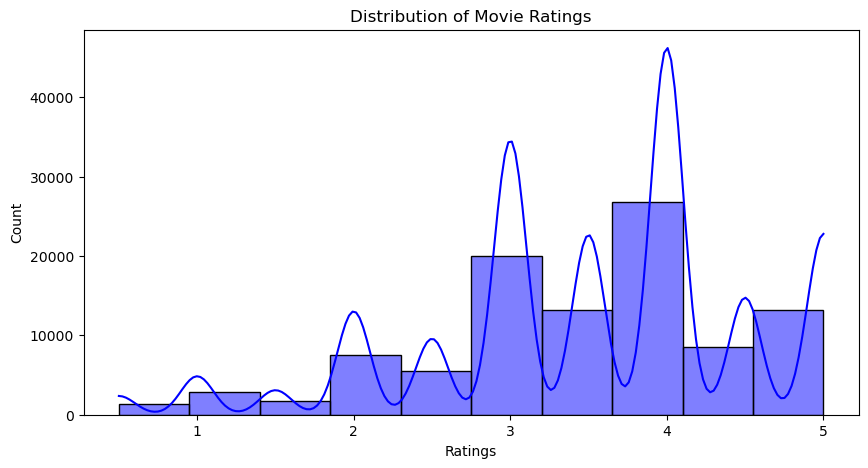

In [123]:
# Distribution of Ratings
plt.figure(figsize=(10,5))
sns.histplot(data['rating'], bins=10, kde=True, color='blue')
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Distribution of Movie Ratings")
plt.show()

- The spikes at 4 and 5 suggest that users tend to rate movies positively more often than negatively.
- A smooth KDE (Kernel Density Estimate) line overlays the histogram to visualize the density.
- This insight helps in understanding user rating behavior and whether certain biases exist (e.g., fewer very low ratings).

#### Distribution of Number of Ratings per Movie

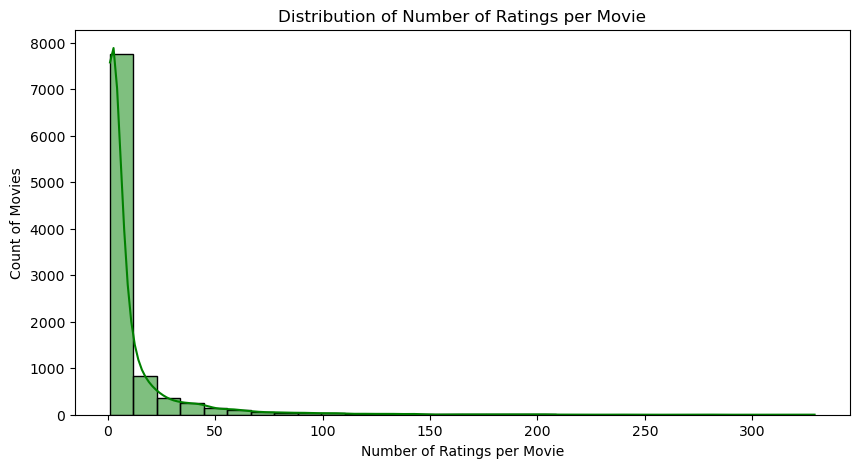

In [124]:
# Number of Ratings per Movie
movie_rating_count = data.groupby('movieId').size()

plt.figure(figsize=(10, 5))
sns.histplot(movie_rating_count, bins=30, kde=True, color='green')
plt.xlabel("Number of Ratings per Movie")
plt.ylabel("Count of Movies")
plt.title("Distribution of Number of Ratings per Movie")
plt.show()

- The right-skewed distribution indicates that most movies receive very few ratings.
- Only a small number of movies receive a very high number of ratings.
- This is a typical characteristic of real-world recommendation system datasets, where popular movies dominate user attention.

#### Top 10 Most Rated Movies

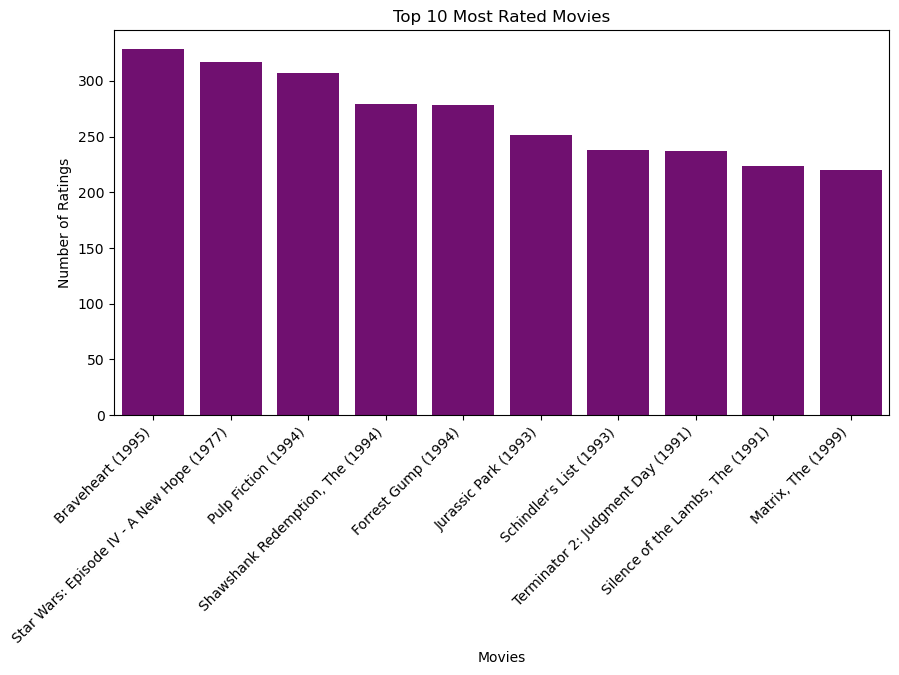

In [125]:
# Top 10 most rated movies
top_rated_movies = data.groupby('movieId').size().sort_values(ascending=False).head(10)
top_rated_movies_titles = movies[movies['movieId'].isin(top_rated_movies.index)]

plt.figure(figsize=(10, 5))
sns.barplot(x=top_rated_movies_titles['title'], y=top_rated_movies.values, color='purple')
plt.xlabel("Movies")
plt.ylabel("Number of Ratings")
plt.title("Top 10 Most Rated Movies")
plt.xticks(rotation=45, ha='right')
plt.show()


- Movies like "Braveheart (1995)", "Star Wars: A New Hope (1977)", and "Pulp Fiction (1994)" have the highest engagement.
- These are well-known, highly-rated classics, indicating that widely popular movies tend to get more ratings.
- This can lead to popularity bias in recommendations, where older, well-rated movies are recommended more often.

#### Distribution of Number of Ratings per User 

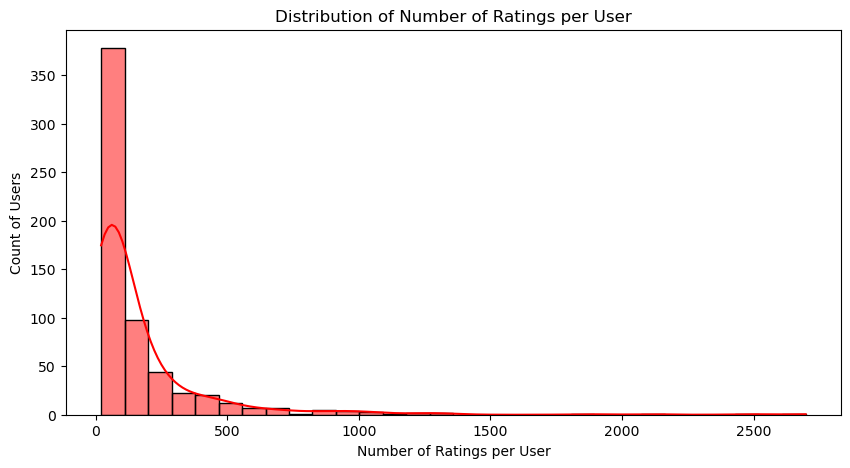

In [126]:
# Distribution of ratings per user
user_rating_count = data.groupby('userId').size()

plt.figure(figsize=(10, 5))
sns.histplot(user_rating_count, bins=30, kde=True, color='red')
plt.xlabel("Number of Ratings per User")
plt.ylabel("Count of Users")
plt.title("Distribution of Number of Ratings per User")
plt.show()

- Like the previous movie rating distribution, this distribution is also right-skewed.
- Most users rate very few movies, while a small percentage of users are highly active and provide hundreds or thousands of ratings.

####  Ratings Count by Genre

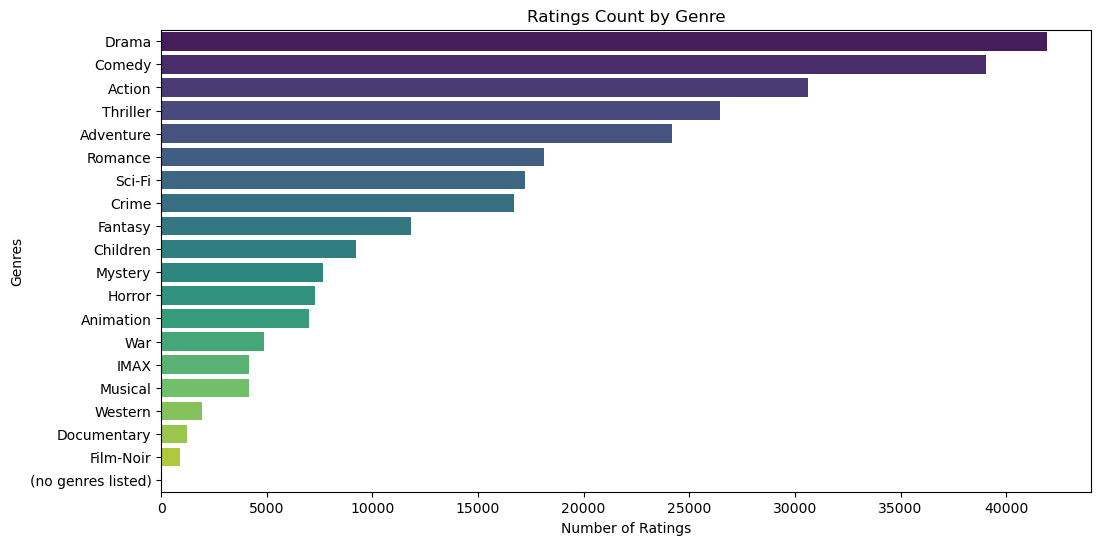

In [127]:
# Ratings Count by Genre
data['genres'] = data['genres'].str.split('|')
data_exploded = data.explode('genres')

plt.figure(figsize=(12, 6))
sns.countplot(y=data_exploded['genres'], palette='viridis', order=data_exploded['genres'].value_counts().index)
plt.xlabel("Number of Ratings")
plt.ylabel("Genres")
plt.title("Ratings Count by Genre")
plt.show()


- Drama, Comedy, and Action are the most frequently rated genres, indicating their popularity.
- Less common genres like Film-Noir and Documentary have significantly fewer ratings.

## DATA PREPARATION

- Will create a variable with a defined rating scale.
- Will convert the Pandas DataFrame to Surprise Dataset.

In [128]:
# PREPARE DATA FOR SURPRISE LIBRARY
reader = Reader(rating_scale=(0.5, 5.0))  # Define rating scale
surprise_data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

## MODELING

We will train multiple models and select the best for our system by use of the RMSE(Root Mean Squared).

The models include:
 - SVD(Singular Value Decomposition)
 - KNNBasic(Simple nearest neighbours)
 - KNNWithMeans(Neighbours but with mean adjustment)

Will use Cross-validation to ensure our models are properly evaluated.

In [129]:
# TRAIN MULTIPLE MODELS AND COMPARE PERFORMANCE
models = {
    "SVD": SVD(),
    "KNN Basic": KNNBasic(),
    "KNN With Means": KNNWithMeans()
}

In [130]:
model_results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    cross_val_results = cross_validate(model, surprise_data, cv=5, verbose=False)
    mean_rmse = np.mean(cross_val_results['test_rmse'])
    model_results[model_name] = mean_rmse
    print(f"{model_name} RMSE: {mean_rmse}")


Training SVD...
SVD RMSE: 0.8727436237958104
Training KNN Basic...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
KNN Basic RMSE: 0.9476366939677217
Training KNN With Means...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
KNN With Means RMSE: 0.8970119755194336


In [131]:
# Select the best model based on lowest RMSE
best_model_name = min(model_results, key=model_results.get)
best_model = models[best_model_name]
print(f"Best Model: {best_model_name} with RMSE {model_results[best_model_name]}")


Best Model: SVD with RMSE 0.8727436237958104


#### Hyperparameter tuning with GridSearchCV

- Hyperparameter tuning is essential for improving the performance of our recommendation models. GridSearchCV helps by systematically searching for the best combination of hyperparameters, leading to better accuracy and generalization.

In [132]:
param_grid = {
    'n_factors': [5, 10, 15],
    'n_epochs': [10, 20],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.1]
}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5, refit=True)
gs.fit(surprise_data)

In [133]:
# Best parameters from GridSearch
best_params = gs.best_params['rmse']
print("Best SVD Parameters:", best_params)

Best SVD Parameters: {'n_factors': 15, 'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.1}


- We will use a Pipeline to structure the training of our recommendation model

In [134]:
# Train the best model using a pipeline
pipeline = Pipeline([
    ('svd', SVD(**best_params))
])

trainset = surprise_data.build_full_trainset()
pipeline.named_steps['svd'].fit(trainset)

In [135]:
# GENERATE MOVIE RECOMMENDATIONS

def recommend_movies(user_id, n=10):
    """ Recommends top 'n' movies for a given user based on predicted ratings. """
    all_movie_ids = set(movies['movieId'].unique())
    rated_movies = set(data[data['userId'] == user_id]['movieId'])
    unseen_movies = list(all_movie_ids - rated_movies)
    
    predictions = [best_model.predict(user_id, movie_id) for movie_id in unseen_movies]
    predictions.sort(key=lambda x: x.est, reverse=True)  # Sort by estimated rating
    
    top_movie_ids = [pred.iid for pred in predictions[:n]]
    recommended_movies = movies[movies['movieId'].isin(top_movie_ids)]
    
    return recommended_movies[['movieId', 'title', 'genres']]

In [136]:

# Example Usage: Recommend top 10 movies for user 1
user_id = 1
print(f"Top 10 Recommended Movies for User {user_id} using {best_model_name}:")
print(recommend_movies(user_id))

Top 10 Recommended Movies for User 1 using SVD:
      movieId                                           title  \
277       318                Shawshank Redemption, The (1994)   
686       904                              Rear Window (1954)   
878      1172  Cinema Paradiso (Nuovo cinema Paradiso) (1989)   
901      1199                                   Brazil (1985)   
906      1204                       Lawrence of Arabia (1962)   
922      1221                  Godfather: Part II, The (1974)   
971      1272                                   Patton (1970)   
987      1288                       This Is Spinal Tap (1984)   
1494     2019     Seven Samurai (Shichinin no samurai) (1954)   
6016    38061                      Kiss Kiss Bang Bang (2005)   

                             genres  
277                     Crime|Drama  
686                Mystery|Thriller  
878                           Drama  
901                  Fantasy|Sci-Fi  
906             Adventure|Drama|War  
922     

## CONCLUSION

- Our recommendation system successfully generates top-5 movie recommendations for users based on past ratings.
- SVD (Singular Value Decomposition) was the best-performing algorithm, demonstrating strong predictive accuracy.
- GridSearchCV and Pipelines optimized model performance, ensuring robust parameter selection and efficient training.
- Popular movies and genres receive disproportionately high ratings, leading to potential bias in recommendations.


## RECOMMENDATION

- Introduce a diversity factor, ensuring recommendations include different genres rather than just high-rated films.
- Allow users to explicitly specify their preferences (favorite genres, actors, etc.).Provide personalized dashboards with insights into user movie-watching patterns.
- Increase the promotion of less popular movies. By promoting these movies, it may lead to an increase in their popularity and more positive ratings.
- Increase the supply of drama, comedy, and action movies: These genres were the most popular among the users, and therefore, there is a higher chance of success if more movies in these genres are pushed in the platform.
- Consider user-generated tags: Although the tags were not included in this analysis, they can provide valuable insight into how users perceive movies. By analyzing user-generated tags, it may help in understanding the users' preferences and improving the movie recommendation system.